<a href="https://colab.research.google.com/github/atulya97/Deep-Learning/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [0]:
import tensorflow as tf 
from tensorflow import keras


In [0]:
tf.random.set_seed(42)
np.random.seed(42)

In [0]:
mnistDB = keras.datasets.mnist


In [0]:
(X_train, y_train),(X_test, y_test) = mnistDB.load_data() #it returns  4 values as two tuples..


In [0]:
print("Shape of X_train: ", X_train.shape) #training input
print("Shape of X_test: ", X_test.shape) #testing input

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


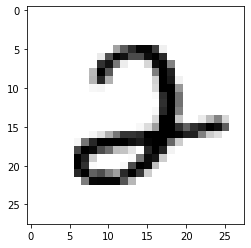

In [0]:
plt.imshow(X_train[16], cmap='binary') 


In [0]:
X_train = X_train.reshape((60000, 28*28))


In [0]:
print(X_train[1])   # can use .shape as well


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253 252 252  96 189 253 167   

In [0]:
#some values are 0 some are not...so we need to scale these values...
#mnist is a grey scale image so...highest value is 255.. so we divide it with 255
print(215/255)
print(type(215/255))

0.8431372549019608
<class 'float'>


In [0]:
X_train = X_train.astype('float32')/255 #convert to make it more efficient..
#print(X_train[45])

In [0]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32')/255

In [0]:
dnn = keras.models.Sequential()

In [0]:
dnn.add(keras.layers.Dense(50, activation="relu",input_shape=X_train.shape[1:]))

In [0]:
dnn.add(keras.layers.Dense(30, activation="relu"))

In [0]:

dnn.add(keras.layers.Dense(10, activation="softmax"))
dnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                410       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                3

In [0]:
dnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy']) #instead of rmsprop we can also use adam...

In [0]:
dnn.fit(x=X_train,y=y_train,validation_split=0.3,epochs=20,batch_size=16)

Epoch 1/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3021 - val_accuracy: 0.1079
Epoch 2/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3022 - val_accuracy: 0.1079
Epoch 3/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1079
Epoch 4/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 5/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3022 - val_accuracy: 0.1079
Epoch 6/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3021 - val_accuracy: 0.1079
Epoch 7/20
2625/2625 [==============================] - 6s 2ms/step - loss: 2.3012 - accuracy: 0.1143 - val_loss: 2.3021 - val_accuracy:

In [0]:
test_loss, test_accuracy = dnn.evaluate(x=X_test, y=y_test)
print(test_loss, test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 2.3009 - accuracy: 0.1135
2.3008995056152344 0.11349999904632568
